# Livro: An Introduction to Estatistical Learning

## Seção: 9.4

In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


INPUT_DIR = 'C:/Users/Igor/Desktop/TÓPICOS 2/Bancos'

iris = pd.read_csv(f'{INPUT_DIR}/IRIS.csv') #Iris Flower Dataset



def cm_to_inch(value):
    return value/2.54

Seção trata de SVM's dentro de um contexto de classificação em que cada observação pode ser classificada em mais de duas classes distintas

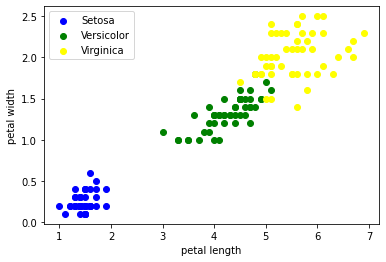

In [16]:

plt.scatter(iris['petal_length'][iris['species']=='Iris-setosa'],iris['petal_width'][iris['species']=='Iris-setosa'],color='blue', label = 'Setosa')
plt.scatter(iris['petal_length'][iris['species']=='Iris-versicolor'],iris['petal_width'][iris['species']=='Iris-versicolor'],color='green', label = 'Versicolor')
plt.scatter(iris['petal_length'][iris['species']=='Iris-virginica'],iris['petal_width'][iris['species']=='Iris-virginica'],color='yellow', label = 'Virginica')
plt.legend()
plt.xlabel("petal length") #comprimento
plt.ylabel("petal width") #largura
plt.show()

## Iterações para One-Versus-All Classification

Comparar, para cada classe possível, ela com uma classe arbitrária dita como não ela

## 1

Setosa com não Setosa

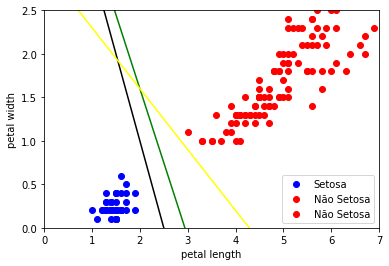

<Figure size 2834.65x2834.65 with 0 Axes>

In [40]:
# Dados perfeitamente separáveis => Maximal Margin Classifier

x = np.linspace(0, 7, num=100)
y1 = -2 * x + 5    #candidato à Maximal Margin Classifier
y2 = -1.7 * x + 5  #candidato à Maximal Margin Classifier
y3 = -0.7 * x + 3  #candidato à Maximal Margin Classifier



plt.scatter(iris['petal_length'][iris['species']=='Iris-setosa'],iris['petal_width'][iris['species']=='Iris-setosa'],color='blue', label = 'Setosa')
plt.scatter(iris['petal_length'][iris['species']=='Iris-versicolor'],iris['petal_width'][iris['species']=='Iris-versicolor'],color='red', label = 'Não Setosa')
plt.scatter(iris['petal_length'][iris['species']=='Iris-virginica'],iris['petal_width'][iris['species']=='Iris-virginica'],color='red', label = 'Não Setosa')
plt.plot(x, y1, color = 'black')
plt.plot(x, y2, color = 'green')
plt.plot(x, y3, color = 'yellow')
plt.legend()
plt.ylim((0, 2.5))
plt.xlim((0, 7))
plt.xlabel("petal length") #comprimento
plt.ylabel("petal width") #largura
plt.figure(figsize=((cm_to_inch(100), cm_to_inch(100))))
plt.show()

## 2

Virginica com não Virginica

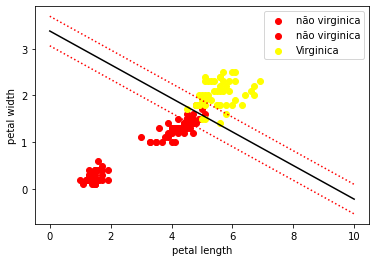

<Figure size 2834.65x2834.65 with 0 Axes>

In [187]:
# Dados não são perfeitamente separáveis => Support Vector Classifier

x1 = np.linspace(0, 10, num=100)
x2 = np.linspace(0, 10, num=100)

p = np.array([4.8, 2.5]) #ponto no hyperplano
beta = np.array([3,1]) #vetor ortogonal ao hyperplano
beta0= np.inner(p, beta)

modulo_beta = np.sqrt(3**2 + 1**2) #tamanho de beta

margem = 1/modulo_beta

y = (np.inner(p, beta)-x2*1.8)/5 #hyperplano
plt.scatter(iris['petal_length'][iris['species']=='Iris-setosa'],iris['petal_width'][iris['species']=='Iris-setosa'],color='red', label = 'não virginica')
plt.scatter(iris['petal_length'][iris['species']=='Iris-versicolor'],iris['petal_width'][iris['species']=='Iris-versicolor'],color='red', label = 'não virginica')
plt.scatter(iris['petal_length'][iris['species']=='Iris-virginica'],iris['petal_width'][iris['species']=='Iris-virginica'],color='yellow', label = 'Virginica')

plt.plot(x1, y , color = 'black')
plt.plot(x1, y+margem, color = 'red', linestyle = 'dotted')
plt.plot(x1, y-margem, color = 'red', linestyle = 'dotted')

plt.legend()
#plt.ylim((0, 3))
#plt.xlim((2.5, 7))
plt.xlabel("petal length") #comprimento
plt.ylabel("petal width") #largura
plt.figure(figsize=((cm_to_inch(100), cm_to_inch(100))))
plt.show()

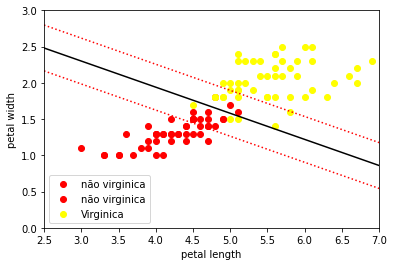

<Figure size 2834.65x2834.65 with 0 Axes>

In [188]:
# Dados não são perfeitamente separáveis => Support Vector Classifier

x1 = np.linspace(0, 10, num=100)
x2 = np.linspace(0, 10, num=100)

p = np.array([4.8, 2.5]) #ponto no hyperplano
beta = np.array([3,1]) #vetor ortogonal ao hyperplano
beta0= np.inner(p, beta)

modulo_beta = np.sqrt(3**2 + 1**2) #tamanho de beta

margem = 1/modulo_beta

y = (np.inner(p, beta)-x2*1.8)/5 #hyperplano
plt.scatter(iris['petal_length'][iris['species']=='Iris-setosa'],iris['petal_width'][iris['species']=='Iris-setosa'],color='red', label = 'não virginica')
plt.scatter(iris['petal_length'][iris['species']=='Iris-versicolor'],iris['petal_width'][iris['species']=='Iris-versicolor'],color='red', label = 'não virginica')
plt.scatter(iris['petal_length'][iris['species']=='Iris-virginica'],iris['petal_width'][iris['species']=='Iris-virginica'],color='yellow', label = 'Virginica')

plt.plot(x1, y , color = 'black')
plt.plot(x1, y+margem, color = 'red', linestyle = 'dotted')
plt.plot(x1, y-margem, color = 'red', linestyle = 'dotted')

plt.legend()
plt.ylim((0, 3))
plt.xlim((2.5, 7))
plt.xlabel("petal length") #comprimento
plt.ylabel("petal width") #largura
plt.figure(figsize=((cm_to_inch(100), cm_to_inch(100))))
plt.show()

# 3

Versicolor com não Versicolor



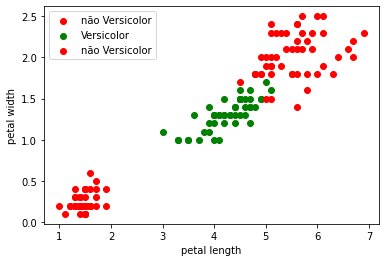

<Figure size 2834.65x2834.65 with 0 Axes>

In [191]:
# Dados não são  linearmente separáveis no plano "sepal lenth" - "sepal width"

# Teria que aplicar o SVM

plt.scatter(iris['petal_length'][iris['species']=='Iris-setosa'],iris['petal_width'][iris['species']=='Iris-setosa'],color='red', label = 'não Versicolor')
plt.scatter(iris['petal_length'][iris['species']=='Iris-versicolor'],iris['petal_width'][iris['species']=='Iris-versicolor'],color='green', label = 'Versicolor')
plt.scatter(iris['petal_length'][iris['species']=='Iris-virginica'],iris['petal_width'][iris['species']=='Iris-virginica'],color='red', label = 'não Versicolor')

plt.legend()
#plt.ylim((0, 3))
#plt.xlim((2.5, 7))
plt.xlabel("petal length") #comprimento
plt.ylabel("petal width") #largura
plt.figure(figsize=((cm_to_inch(100), cm_to_inch(100))))
plt.show()